In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import sys

import os

import matplotlib.pyplot as plt 
import japanize_matplotlib
import seaborn as sns

In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
weather = pd.read_csv('../weather.csv')

# 外れ値除外

In [3]:
# # 2023年の各品種の平均∓標準偏差以外の価格を除外
# kindList = train['kind'].unique()

# dfList = []
# for kind in kindList:
#     df = train[(train['kind'] == kind) & (train['year'].isin([2023]))]
    
#     mean = df['mode_price'].mean()
#     std = df['mode_price'].std()
#     df = train[(train['kind'] == kind)]
#     dfList.append(df[
#         (df['mode_price'] <= mean+std) & (df['mode_price'] <= mean-std)
#     ])
    
# train = dfList[0].copy()
# for df in dfList[1:]:
#     train = pd.concat([train, df])

In [4]:
# 各年月の価格かつ各品種の平均∓標準偏差以外の価格を除外
kindList = test['kind'].unique()
df = train[train['kind'].isin(kindList)].copy()

def func(row):
    return str(row['date'])[4:6]
df['month'] = df.apply(func, axis=1)

indexList = df.groupby(['kind', 'year', 'month'])['mode_price'].aggregate(['std','mean'])


dfList = []
for index in indexList.index:
    print(index)
    df1 = df[(df['kind'] == index[0]) & (df['year'].isin([index[1]])) & (df['month'].isin([index[2]]))]
    mean = df1['mode_price'].mean()
    std = df1['mode_price'].std()
    print(mean+std, mean-std)
    dfList.append(df1[
        (df1['mode_price'] <= mean+std) & (df1['mode_price'] >= mean-std)
    ])

train = dfList[0].copy()
for df in dfList[1:]:
    train = pd.concat([train, df])

('かぼちゃ', 2005, '11')
1256.7721291174005 1003.4910287773362
('かぼちゃ', 2005, '12')
2123.1686896305287 1179.9563103694713
('かぼちゃ', 2006, '03')
3784.8765043144003 2326.9984956855997
('かぼちゃ', 2006, '04')
4308.807220364812 2583.0109614533703
('かぼちゃ', 2006, '05')
4442.045285061016 2798.3894975476796
('かぼちゃ', 2006, '06')
5029.136059308048 3397.1139406919515
('かぼちゃ', 2006, '07')
3424.5663972609286 2638.0422983912454
('かぼちゃ', 2006, '08')
2904.4622433253394 2115.8502566746606
('かぼちゃ', 2006, '09')
1554.9572753966008 1029.4745427852172
('かぼちゃ', 2006, '10')
1475.1634767195728 1121.3147841499922
('かぼちゃ', 2006, '11')
1651.457437012658 1245.2164760308206
('かぼちゃ', 2006, '12')
2208.7094391907517 1304.4155608092483
('かぼちゃ', 2007, '03')
3264.0679801614406 1692.8070198385594
('かぼちゃ', 2007, '04')
3328.1108128195156 1666.5482780895757
('かぼちゃ', 2007, '05')
2394.307840580985 1426.7791159407539
('かぼちゃ', 2007, '06')
2511.9296208652295 1834.6328791347705
('かぼちゃ', 2007, '07')
2264.0860396423486 1643.7400473141731
('

3927.813763874392 1322.4589633983348
('かぼちゃ', 2021, '05')
4197.334282100271 1737.5228607568724
('かぼちゃ', 2021, '06')
4907.013440367415 2714.7008453468707
('かぼちゃ', 2021, '07')
3777.41861772158 2106.233556191463
('かぼちゃ', 2021, '08')
2154.7273215864825 1322.8726784135174
('かぼちゃ', 2021, '09')
1718.3607245706314 1254.3392754293684
('かぼちゃ', 2021, '10')
1677.8344529963692 1022.1655470036309
('かぼちゃ', 2021, '11')
1663.9526668865165 1364.9564240225745
('かぼちゃ', 2021, '12')
3142.4773403168656 1663.5226596831344
('かぼちゃ', 2022, '03')
3737.949213553472 2312.505331901073
('かぼちゃ', 2022, '04')
4393.738440198333 3060.716105256212
('かぼちゃ', 2022, '05')
3521.14726503199 2354.0527349680096
('かぼちゃ', 2022, '06')
4827.877499776171 2976.408214509544
('かぼちゃ', 2022, '07')
2680.1959136543173 1929.4404499820466
('かぼちゃ', 2022, '08')
2388.618909250427 1447.9525193210018
('かぼちゃ', 2022, '09')
2047.5740429221457 1336.4259570778543
('かぼちゃ', 2022, '10')
1793.6035254385508 1102.7601109250857
('かぼちゃ', 2022, '11')
2472.7095984

1657.095270919863 1082.1774563528645
('きゅうり', 2018, '07')
2392.1931871375946 1589.7198563406664
('きゅうり', 2018, '08')
2434.437166287833 1600.8355609848945
('きゅうり', 2018, '09')
2328.988446279701 1877.8686965774423
('きゅうり', 2018, '10')
2239.446299010204 1817.5971792506657
('きゅうり', 2018, '11')
1782.859128858148 1574.959052960034
('きゅうり', 2018, '12')
3910.84856957184 1874.19490868903
('きゅうり', 2019, '01')
2288.1802666962435 2077.293417514283
('きゅうり', 2019, '02')
1961.330270544035 1764.669729455965
('きゅうり', 2019, '03')
1847.963297231574 1509.854884586608
('きゅうり', 2019, '04')
1343.8645495810347 1042.4211647046795
('きゅうり', 2019, '05')
1159.456774456878 979.9717969716936
('きゅうり', 2019, '06')
1528.0062416533542 1156.5651869180742
('きゅうり', 2019, '07')
2416.7264320769395 1265.0917497412424
('きゅうり', 2019, '08')
1919.0366597467646 1115.2490545389496
('きゅうり', 2019, '09')
2196.2570681497405 1311.171503278831
('きゅうり', 2019, '10')
2197.604848040044 1238.7587883235922
('きゅうり', 2019, '11')
2216.97518675037

149.49582521638663 77.54417478361336
('こまつな', 2012, '11')
198.10050998149467 49.1722172912326
('こまつな', 2012, '12')
349.71438551399126 175.78561448600877
('こまつな', 2013, '01')
212.29278078764938 155.07564026498218
('こまつな', 2013, '02')
116.1922634572479 70.00773654275208
('こまつな', 2013, '03')
80.76574592074004 57.68879953380542
('こまつな', 2013, '04')
178.7300286371347 92.22649310199574
('こまつな', 2013, '05')
104.05884027365215 38.10782639301451
('こまつな', 2013, '06')
250.6119302845481 26.05473638211859
('こまつな', 2013, '07')
230.91844650177052 78.85238683156278
('こまつな', 2013, '08')
204.84480398041214 96.50302210654436
('こまつな', 2013, '09')
277.54101724334055 142.004437302114
('こまつな', 2013, '10')
204.19884987717992 118.00948345615339
('こまつな', 2013, '11')
277.5534409528549 146.21928631987237
('こまつな', 2013, '12')
192.6087870075575 122.80787965910918
('こまつな', 2014, '01')
184.63804537378627 127.2619546262137
('こまつな', 2014, '02')
191.4133134579676 113.8116865420324
('こまつな', 2014, '03')
144.65023920649577

1892.3756140324945 1362.6243859675055
('じゃがいも', 2007, '06')
1300.8058151607374 991.6941848392627
('じゃがいも', 2007, '07')
1406.8205512596455 766.2229270012241
('じゃがいも', 2007, '08')
1735.9964241044313 1489.3296628520902
('じゃがいも', 2007, '09')
1713.353721368407 1341.1917331770476
('じゃがいも', 2007, '10')
1490.0930192535527 1296.7819807464473
('じゃがいも', 2007, '11')
1592.6133479446119 1547.8411975099336
('じゃがいも', 2007, '12')
1603.5493905094993 1467.7006094905007
('じゃがいも', 2008, '01')
1721.2799764278727 1444.4700235721273
('じゃがいも', 2008, '02')
1715.265707083663 1336.5821190032934
('じゃがいも', 2008, '03')
1563.642273505248 1342.948635585661
('じゃがいも', 2008, '04')
1966.9202376808034 1530.036284058327
('じゃがいも', 2008, '05')
1944.6053095995696 1522.6772990960824
('じゃがいも', 2008, '06')
2281.5170439873864 2083.4829560126136
('じゃがいも', 2008, '07')
1943.2198541383589 1412.5801458616413
('じゃがいも', 2008, '08')
1951.1845764449029 1573.1632496420536
('じゃがいも', 2008, '09')
1758.3380653490437 1320.9228042161737
('じゃがいも',

4095.545403887561 3562.1688818267244
('じゃがいも', 2021, '07')
2726.5120909676784 2435.1835612062346
('じゃがいも', 2021, '08')
2298.0590810576414 1445.4909189423586
('じゃがいも', 2021, '09')
3226.409544437302 2548.890455562698
('じゃがいも', 2021, '10')
3114.582932286575 2884.326158622516
('じゃがいも', 2021, '11')
3045.960272043989 2982.403364319647
('じゃがいも', 2021, '12')
3329.005016011387 2986.4235554171846
('じゃがいも', 2022, '01')
3628.5511365851935 3283.4488634148065
('じゃがいも', 2022, '02')
3825.053972549101 3470.3460274508984
('じゃがいも', 2022, '03')
3780.0 3780.0
('じゃがいも', 2022, '04')
3893.34836047393 3195.378912253343
('じゃがいも', 2022, '05')
3849.6649030145495 3110.935096985451
('じゃがいも', 2022, '06')
3189.739298042894 2081.6892733856776
('じゃがいも', 2022, '07')
1467.8631329054085 957.2277761855006
('じゃがいも', 2022, '08')
2034.3882829281288 1320.0402885004428
('じゃがいも', 2022, '09')
2418.1812483030976 1549.5330374111884
('じゃがいも', 2022, '10')
2422.846209603607 2024.790154032757
('じゃがいも', 2022, '11')
2206.0616875065753 20

2187.1969226402457 1494.1943817075803
('にんじん', 2016, '09')
3876.795229915352 2203.113860993739
('にんじん', 2016, '10')
3279.2785071322974 2832.5396746858846
('にんじん', 2016, '11')
2890.635700603661 1881.0006630327032
('にんじん', 2016, '12')
1897.526126681185 1268.223873318815
('にんじん', 2017, '01')
2261.185125800872 1594.414874199128
('にんじん', 2017, '02')
2218.872087161981 1582.7279128380187
('にんじん', 2017, '03')
2098.920661840773 1512.0358598983576
('にんじん', 2017, '04')
2113.4797420459554 1501.948829382616
('にんじん', 2017, '05')
1718.1044556137347 1273.1682716589928
('にんじん', 2017, '06')
1572.2473569695508 1302.0253703031767
('にんじん', 2017, '07')
1503.0129666997098 896.4652941698553
('にんじん', 2017, '08')
1130.1548310945213 671.4815325418425
('にんじん', 2017, '09')
1133.080313817324 742.1924134554034
('にんじん', 2017, '10')
1171.1208839385217 721.3336615160239
('にんじん', 2017, '11')
1589.7574816782967 1203.5152455944308
('にんじん', 2017, '12')
1701.5634766954436 1349.4365233045564
('にんじん', 2018, '01')
1733.7052621

947.267785579016 723.6017796383752
('はくさい', 2012, '08')
1083.6995806979035 797.1699845194878
('はくさい', 2012, '09')
962.9805806936434 757.0194193063566
('はくさい', 2012, '10')
914.281223072704 669.118776927296
('はくさい', 2012, '11')
936.462042234673 671.9470486744179
('はくさい', 2012, '12')
898.7126803053533 643.4748196946467
('はくさい', 2013, '01')
1296.8770785834126 932.9913424692191
('はくさい', 2013, '02')
1325.0866535583136 1016.4133464416863
('はくさい', 2013, '03')
1249.6895867545913 816.9013223363175
('はくさい', 2013, '04')
917.9026505873178 488.1843059344215
('はくさい', 2013, '05')
951.3139062694877 595.2485937305123
('はくさい', 2013, '06')
1104.8105562089706 765.1894437910294
('はくさい', 2013, '07')
1419.823154189405 1023.6143458105951
('はくさい', 2013, '08')
1584.0508287964412 1349.1013451166023
('はくさい', 2013, '09')
1694.2651449665834 1264.8257641243256
('はくさい', 2013, '10')
1230.4786264435659 803.8963735564341
('はくさい', 2013, '11')
1354.420809658685 1043.8746448867696
('はくさい', 2013, '12')
1087.7315053122318 802

559.7670588549838 485.6677237537119
('キャベツ', 2008, '09')
771.6152572620299 492.94996012927436
('キャベツ', 2008, '10')
792.4617914481103 541.9132085518897
('キャベツ', 2008, '11')
1252.7151057443589 828.1939851647322
('キャベツ', 2008, '12')
1227.3244351409714 973.1103474677241
('キャベツ', 2009, '01')
1341.7477810456658 1088.2522189543342
('キャベツ', 2009, '02')
1072.3793698359664 760.3479028913065
('キャベツ', 2009, '03')
1210.2432886057904 980.4385295760277
('キャベツ', 2009, '04')
1511.207166309814 1022.488485864099
('キャベツ', 2009, '05')
1355.8288861122846 978.0347502513517
('キャベツ', 2009, '06')
791.0081239951435 592.7646032775838
('キャベツ', 2009, '07')
663.917562037367 549.302437962633
('キャベツ', 2009, '08')
1120.9572899887933 642.3687969677285
('キャベツ', 2009, '09')
1059.6219302698603 745.9215479910092
('キャベツ', 2009, '10')
670.8898809153393 423.96428575132745
('キャベツ', 2009, '11')
500.8182482021533 382.15902452511943
('キャベツ', 2009, '12')
799.4136714577929 351.386328542207
('キャベツ', 2010, '01')
1257.8656865069033 840

936.2181005842351 664.1455357794011
('キャベツ', 2021, '11')
809.93920572167 564.6062488237845
('キャベツ', 2021, '12')
666.4106089893487 459.8751052963655
('キャベツ', 2022, '01')
851.4122907431397 709.1877092568602
('キャベツ', 2022, '02')
1103.107027392047 840.8929726079531
('キャベツ', 2022, '03')
1201.670151035177 987.7843944193685
('キャベツ', 2022, '04')
1283.2219672663364 935.6871236427545
('キャベツ', 2022, '05')
1222.6605410880704 829.3394589119296
('キャベツ', 2022, '06')
898.1530607870345 660.1326534986797
('キャベツ', 2022, '07')
955.8544642205989 683.7818994157649
('キャベツ', 2022, '08')
819.0905800114253 662.0522771314318
('キャベツ', 2022, '09')
1034.298758314846 698.8440988280109
('キャベツ', 2022, '10')
752.1328057661726 642.0490124156456
('キャベツ', 2022, '11')
912.8373606862658 712.3054964565913
('キャベツ', 2022, '12')
823.4280353089014 531.4810556001896
('キャベツ', 2023, '01')
1060.3639634176377 905.2360365823623
('キャベツ', 2023, '02')
996.0848702589402 845.5993402673756
('キャベツ', 2023, '03')
877.9027968303445 771.55174862

1312.3420118956649 1096.0579881043352
('トマト', 2018, '05')
1251.6158965911875 892.955531980241
('トマト', 2018, '06')
1199.963297231574 861.8548845866079
('トマト', 2018, '07')
1356.535416024384 1132.160236149529
('トマト', 2018, '08')
2014.8712830635195 1352.765080572844
('トマト', 2018, '09')
2090.65709001231 1951.6286242734038
('トマト', 2018, '10')
2025.3047697990282 1749.9995780270588
('トマト', 2018, '11')
2176.6222334363238 1485.5595847454945
('トマト', 2018, '12')
1524.4036317961918 1396.2920203777212
('トマト', 2019, '01')
1328.641693415361 1070.0951486899023
('トマト', 2019, '02')
1500.60743006994 1296.5925699300599
('トマト', 2019, '03')
1604.448251375799 1498.0972031696556
('トマト', 2019, '04')
1526.0442362168535 1107.0986209260038
('トマト', 2019, '05')
999.0852619667966 739.2004523189177
('トマト', 2019, '06')
1270.1536221059173 889.8463778940827
('トマト', 2019, '07')
1225.7827868246434 993.1263040844477
('トマト', 2019, '08')
1148.8464659443678 633.1535340556322
('トマト', 2019, '09')
2372.253472563603 1598.032241722

92.6910359365097 68.3714640634903
('ピーマン', 2013, '08')
74.78861975383423 46.993988941817946
('ピーマン', 2013, '09')
88.71032728596983 71.44876362312108
('ピーマン', 2013, '10')
79.7319278712808 59.22640546205254
('ピーマン', 2013, '11')
83.38512907447631 64.16032547097822
('ピーマン', 2013, '12')
73.81686587453481 59.80813412546519
('ピーマン', 2014, '01')
127.73011523322103 101.96988476677896
('ピーマン', 2014, '02')
108.89508620123479 91.5549137987652
('ピーマン', 2014, '03')
102.82878563012846 79.60303255168972
('ピーマン', 2014, '04')
74.04387001973618 60.18340270753655
('ピーマン', 2014, '05')
57.655180633258375 38.56221067108945
('ピーマン', 2014, '06')
59.3401043992576 27.945609886456698
('ピーマン', 2014, '07')
72.3761727109734 48.623827289026586
('ピーマン', 2014, '08')
75.5287616653846 51.86254268244149
('ピーマン', 2014, '09')
111.75569520236112 57.59213088459541
('ピーマン', 2014, '10')
58.33841581486409 43.95325085180258
('ピーマン', 2014, '11')
52.158472216557826 40.412956354870744
('ピーマン', 2014, '12')
82.1080024627343 50.0659105

1625.1325712639948 982.2960001645768
('ブロッコリー', 2015, '12')
1084.7580754045275 535.2419245954725
('ブロッコリー', 2016, '01')
1937.2963575172876 1177.651010903765
('ブロッコリー', 2016, '02')
2235.157670590641 1632.2709008379306
('ブロッコリー', 2016, '03')
2256.2818969672267 1444.5181030327735
('ブロッコリー', 2016, '11')
2230.938475100599 1715.9706158084916
('ブロッコリー', 2016, '12')
1868.3659266699412 1499.2704369664223
('ブロッコリー', 2017, '01')
2238.2048286376985 1555.2951713623015
('ブロッコリー', 2017, '02')
2033.7828693890006 1649.5855516636311
('ブロッコリー', 2017, '03')
1620.0 1620.0
('ブロッコリー', 2017, '05')
1610.2041989697839 1148.7048919393071
('ブロッコリー', 2017, '06')
2458.545043563663 1998.9095018908818
('ブロッコリー', 2017, '07')
1968.3069649683957 1619.1712959011693
('ブロッコリー', 2017, '11')
2220.3312799446367 1486.0323564189998
('ブロッコリー', 2017, '12')
2670.468789325747 1734.0529498046883
('ブロッコリー', 2018, '01')
2286.6602510549947 1997.3397489450053
('ブロッコリー', 2018, '02')
2582.5302940704137 1833.4697059295863
('ブロッコリー', 2018, 

In [5]:
alldata = pd.concat([train.copy(), test.copy()], axis = 0)

#データ件数
trainSuv = alldata[:len(train)]
testSuv = alldata[len(train):]
print(len(trainSuv), len(testSuv))

30160 220


# 天気データ加工

In [6]:
area_pairs = alldata['area'].unique()

yasai_areas = set()

for area_pair in area_pairs:
    areas = area_pair.split('_')
    yasai_areas |= set(areas)

yasai_areas

wea_areas = weather['area'].unique()
wea_areas

array(['青森', '盛岡', '秋田', '仙台', '山形', '福島', '水戸', '宇都宮', '前橋', '熊谷', '甲府',
       '横浜', '千葉', '浜松', '長野', '新潟', '名古屋', '高松', '徳島', '高知', '松山', '那覇',
       '鹿児島', '宮崎', '長崎', '熊本', '福岡', '佐賀', '和歌山', '神戸', '帯広', '東京'],
      dtype=object)

In [7]:
area_map = {}

update_area_map = {
    '岩手':'盛岡','宮城':'仙台','静岡':'浜松','沖縄':'那覇','神奈川':'横浜','愛知':'名古屋','茨城':'水戸','北海道':'帯広','各地':'全国',
    '兵庫':'神戸','香川':'高松','埼玉':'熊谷','国内':'全国','山梨':'甲府','栃木':'宇都宮','群馬':'前橋','愛媛':'松山'
}

for yasai_area in yasai_areas:
    if yasai_area not in wea_areas and yasai_area not in update_area_map:
        area_map[yasai_area] = '全国' # 外国の天候は全国にしておく
    else:
        area_map[yasai_area] = yasai_area

area_map = {**area_map, **update_area_map}
area_map

{'岩手': '盛岡',
 '福島': '福島',
 '群馬': '前橋',
 '愛知': '名古屋',
 '宮崎': '宮崎',
 '兵庫': '神戸',
 '東京': '東京',
 '茨城': '水戸',
 '静岡': '浜松',
 '高知': '高知',
 'トンガ': '全国',
 'メキシコ': '全国',
 '千葉': '千葉',
 '長崎': '長崎',
 '各地': '全国',
 '埼玉': '熊谷',
 '熊本': '熊本',
 '神奈川': '横浜',
 '沖縄': '那覇',
 '栃木': '宇都宮',
 '徳島': '徳島',
 '鹿児島': '鹿児島',
 'ニュージーランド': '全国',
 '長野': '長野',
 '北海道': '帯広',
 '青森': '青森',
 '宮城': '仙台',
 '香川': '高松',
 '国内': '全国',
 '山梨': '甲府',
 '愛媛': '松山'}

In [8]:
alldata['area'] = alldata['area'].apply(lambda x: '_'.join([area_map[i] for i in x.split('_')]))
alldata

,kind,date,amount,mode_price,area,year,weekno,month
32654,かぼちゃ,20051111,59750.0,1050.0,全国_帯広,2005,45,11
32656,かぼちゃ,20051114,100312.0,1050.0,全国,2005,46,11
32657,かぼちゃ,20051115,61990.0,1050.0,全国_帯広,2005,46,11
32660,かぼちゃ,20051118,42420.0,1155.0,全国_帯広,2005,46,11
32663,かぼちゃ,20051122,53720.0,1155.0,全国_帯広,2005,47,11
...,...,...,...,...,...,...,...,...
215,じゃがいも,20230725,NaN,NaN,全国_水戸_浜松,2023,30,NaN
216,じゃがいも,20230727,NaN,NaN,全国_水戸_浜松,2023,30,NaN
217,じゃがいも,20230728,NaN,NaN,全国_水戸_浜松,2023,30,NaN
218,じゃがいも,20230729,NaN,NaN,全国_水戸_浜松,2023,30,NaN


In [9]:
weather['year'] = weather['date'].apply(lambda x: int(str(x)[:4]))
weather['month'] = weather['date'].apply(lambda x: int(str(x)[4:6]))
weather

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area,year,month
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森,2004,11
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森,2004,11
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森,2004,11
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森,2004,11
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森,2004,11
...,...,...,...,...,...,...,...,...,...,...,...,...
218107,20230626,26.4,28.6,2023/6/26 16:13,24.4,2023/6/26 09:05,19.0,2.0,81.0,長崎,2023,6
218108,20230627,27.5,30.3,2023/6/27 13:09,26.0,2023/6/27 06:29,0.5,6.4,78.0,長崎,2023,6
218109,20230628,26.8,29.0,2023/6/28 13:34,26.3,2023/6/28 09:07,6.5,0.8,84.0,長崎,2023,6
218110,20230629,27.4,30.4,2023/6/29 14:22,26.0,2023/6/29 06:49,8.0,1.9,83.0,長崎,2023,6


In [10]:
alldata['year'] = alldata['date'].apply(lambda x: int(str(x)[:4]))
alldata['month'] = alldata['date'].apply(lambda x: int(str(x)[4:6]))
alldata

,kind,date,amount,mode_price,area,year,weekno,month
32654,かぼちゃ,20051111,59750.0,1050.0,全国_帯広,2005,45,11
32656,かぼちゃ,20051114,100312.0,1050.0,全国,2005,46,11
32657,かぼちゃ,20051115,61990.0,1050.0,全国_帯広,2005,46,11
32660,かぼちゃ,20051118,42420.0,1155.0,全国_帯広,2005,46,11
32663,かぼちゃ,20051122,53720.0,1155.0,全国_帯広,2005,47,11
...,...,...,...,...,...,...,...,...
215,じゃがいも,20230725,NaN,NaN,全国_水戸_浜松,2023,30,7
216,じゃがいも,20230727,NaN,NaN,全国_水戸_浜松,2023,30,7
217,じゃがいも,20230728,NaN,NaN,全国_水戸_浜松,2023,30,7
218,じゃがいも,20230729,NaN,NaN,全国_水戸_浜松,2023,30,7


In [11]:
agg_cols = ['mean_temp', 'max_temp', 'min_temp', 'sum_rain', 'sun_time', 'mean_humid']
weather_month = weather.groupby(['area', 'year', 'month'])[agg_cols].agg(['mean','max','min','sum']).reset_index()

new_cols = []
del_cols = []
for col1, col2 in weather_month.columns:
    if col2:
        new_cols.append(col2+'_'+col1)
    else:
        new_cols.append(col1)
    
    if col2 == 'sum':
        if col1 in ['mean_temp', 'max_temp', 'min_temp', 'mean_humid', 'sum_rain']:
            del_cols.append(col2+'_'+col1)
weather_month.columns = new_cols
weather_month = weather_month.drop(del_cols, axis=1)
weather_month.size

157696

In [12]:
agg_cols = [i for i in weather_month.columns if i not in ['year', 'month', 'area']]
tmp_df = weather_month.groupby(['year', 'month'])[agg_cols].agg(['mean']).reset_index()

new_cols = []
for col1, col2 in tmp_df.columns:
    new_cols.append(col1)

tmp_df.columns = new_cols
tmp_df['area'] = '全国'
tmp_df = tmp_df[weather_month.columns]
weather_month = pd.concat([weather_month, tmp_df])
weather_month.to_csv('../proccesseddata/weather_month.csv', index=False, encoding='cp932')

In [13]:
target_cols = [i for i in weather_month.columns if i != 'area']
target_cols

['year',
 'month',
 'mean_mean_temp',
 'max_mean_temp',
 'min_mean_temp',
 'mean_max_temp',
 'max_max_temp',
 'min_max_temp',
 'mean_min_temp',
 'max_min_temp',
 'min_min_temp',
 'mean_sum_rain',
 'max_sum_rain',
 'min_sum_rain',
 'mean_sun_time',
 'max_sun_time',
 'min_sun_time',
 'sum_sun_time',
 'mean_mean_humid',
 'max_mean_humid',
 'min_mean_humid']

In [14]:
# 複数エリアの場合は平均値を採用
area_pair_dfs = []
area_pairs = alldata['area'].unique()

for area_pair in area_pairs:
    areas = area_pair.split('_')
    if len(areas) > 0:
        area = areas[0]
        base_tmp_df = weather_month[weather_month['area'] == area]
        base_tmp_df = base_tmp_df[target_cols].reset_index(drop=True)
        
        for area in areas[1:]:
            tmp_df = weather_month[weather_month['area'] == area]
            tmp_df = tmp_df[target_cols].reset_index(drop=True)
            base_tmp_df = base_tmp_df.add(tmp_df)
        
        base_tmp_df /= len(areas)
        base_tmp_df['area'] = area_pair
        area_pair_dfs.append(base_tmp_df)

In [15]:
area_pair_df = pd.concat(area_pair_dfs)
print(area_pair_df.shape)
area_pair_df.head()
area_pair_df.to_csv('./output/area_pair_df.csv', index=False, encoding='cp932')

(29120, 22)


In [16]:
area_pair_df.to_csv('./output/preprocessed_weather.csv', index=False, encoding='cp932')

In [17]:
weather_month = area_pair_df

In [30]:
test_kinds

array(['にんじん', 'キャベツ', 'はくさい', 'こまつな', 'ブロッコリー', 'きゅうり', 'かぼちゃ', 'トマト',
       'ピーマン', 'じゃがいも'], dtype=object)

In [18]:
alldata.head()

,kind,date,amount,mode_price,area,year,weekno,month
32654,かぼちゃ,20051111,59750.0,1050.0,全国_帯広,2005,45,11
32656,かぼちゃ,20051114,100312.0,1050.0,全国,2005,46,11
32657,かぼちゃ,20051115,61990.0,1050.0,全国_帯広,2005,46,11
32660,かぼちゃ,20051118,42420.0,1155.0,全国_帯広,2005,46,11
32663,かぼちゃ,20051122,53720.0,1155.0,全国_帯広,2005,47,11


In [19]:
'''
https://qr.paps.jp/qjlIA
https://nagasaki-noc.ne.jp/python-concat-time-error-invalidindexerror
'''
def add_weather_feat(all_df, nshift):

    mer_wea_df = weather_month.copy()
    mer_wea_df.columns = [f'{i}_{nshift}prev' if i not in ['year','month','area'] else i for i in mer_wea_df.columns]
    mer_wea_df = mer_wea_df.rename(columns={'year':'merge_year','month':'merge_month'})

    data = []

    for year, month in zip(all_df['year'].values, all_df['month'].values):
        month -= nshift
        if month <= 0:
            month += 12
            year -=1
        data.append([year, month])
    tmp_df = pd.DataFrame(data, columns=['merge_year','merge_month'])

    all_df = all_df.reset_index(drop=True) 
    tmp_df = tmp_df.reset_index(drop=True)
    mer_df = pd.concat([all_df, tmp_df],axis=1).reset_index(drop=True)

    mer_df = pd.merge(mer_df, mer_wea_df, on=['merge_year','merge_month','area'], how='left')
    mer_df.drop(['merge_year', 'merge_month'], axis=1, inplace=True)

    return mer_df


mer_df = alldata.copy()
for nshift in [1,2,3,6,9,12]:
    mer_df = add_weather_feat(mer_df, nshift)

print(mer_df.shape)
mer_df.head()

(30380, 122)


,kind,date,amount,mode_price,area,year,weekno,month,mean_mean_temp_1prev,max_mean_temp_1prev,...,mean_sum_rain_12prev,max_sum_rain_12prev,min_sum_rain_12prev,mean_sun_time_12prev,max_sun_time_12prev,min_sun_time_12prev,sum_sun_time_12prev,mean_mean_humid_12prev,max_mean_humid_12prev,min_mean_humid_12prev
0,かぼちゃ,20051111,59750.0,1050.0,全国_帯広,2005,45,11,14.846018,19.665625,...,2.038438,24.289062,0.0,5.567312,9.439063,0.0,139.182813,66.99875,89.984375,46.796875
1,かぼちゃ,20051114,100312.0,1050.0,全国,2005,46,11,18.401714,23.931250,...,3.456875,42.578125,0.0,5.446625,9.478125,0.0,136.165625,67.87750,87.968750,49.593750
2,かぼちゃ,20051115,61990.0,1050.0,全国_帯広,2005,46,11,14.846018,19.665625,...,2.038438,24.289062,0.0,5.567312,9.439063,0.0,139.182813,66.99875,89.984375,46.796875
3,かぼちゃ,20051118,42420.0,1155.0,全国_帯広,2005,46,11,14.846018,19.665625,...,2.038438,24.289062,0.0,5.567312,9.439063,0.0,139.182813,66.99875,89.984375,46.796875
4,かぼちゃ,20051122,53720.0,1155.0,全国_帯広,2005,47,11,14.846018,19.665625,...,2.038438,24.289062,0.0,5.567312,9.439063,0.0,139.182813,66.99875,89.984375,46.796875


In [20]:
mer_df.to_csv('./output/mer_df.csv', index=False, encoding='cp932')

# モデル作成

In [21]:
test_kinds = test['kind'].unique()

train_for_model = mer_df[:len(train)].copy()
train_for_model = train_for_model[train_for_model['kind'].isin(test_kinds)]
# train_for_model = train_for_model[(train_for_model['month'].isin([4,5,6]))]
train_for_model = train_for_model[(train_for_model['month'].isin([5,6,7]))]
train_for_model = train_for_model[(train_for_model['year'].isin(range(2000,2023)))]
train_for_model = train_for_model[~(train_for_model['year'].isin([2020]))]
print(train_for_model['year'].unique())
print(train_for_model['month'].unique())
train_for_model = train_for_model.drop(['date','amount','area','year','weekno','month'], axis=1)

test_for_model = mer_df[len(train):].copy()
test_for_model = test_for_model.drop(['date','amount','area','year','weekno','month'], axis=1)

print(len(mer_df), len(train), len(test), len(train_for_model), len(test_for_model))

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2021 2022]
[5 6 7]
30380 30160 220 6952 220


In [22]:
train_for_model.head().to_csv('train_for_model.csv', encoding='cp932')
test_for_model.head().to_csv('test_for_model.csv', encoding='cp932')

In [23]:
from sklearn.model_selection import train_test_split
import time
import lightgbm as lgb

# 初投稿時のパラメーター
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 42,
#     'max_depth': 7,
#     "feature_fraction": 0.8,
#     'subsample_freq': 1,
#     "bagging_fraction": 0.95,
#     'min_data_in_leaf': 2,
#     'learning_rate': 0.1,
#     "boosting": "gbdt",
#     "lambda_l1": 0.1,
#     "lambda_l2": 10,
#     "verbosity": -1,
#     "random_state": 42,
#     "num_boost_round": 50000,
#     "early_stopping_rounds": 100
# }

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'n_jobs':8,
    "verbosity": -1,
    "random_state": 42,
    "num_boost_round": 50000,
    "early_stopping_rounds": 100
}

sub = pd.read_csv('../sample_submission.csv')
model_dict = {}
for kind in test_kinds:
    # 学習データ作成
    y_train =  train_for_model[train_for_model['kind'] == kind].copy()['mode_price']
    X_train =  train_for_model[train_for_model['kind'] == kind].copy().drop('mode_price', axis=1)
    X_test = test_for_model.copy()
    
    X_train = X_train.drop(['kind'], axis=1)
    X_test = X_test.drop(['kind', 'mode_price'], axis=1)

    print(kind, len(X_train), len(X_test))
    # stratifyパラメータについて
    # https://kakakakakku.hatenablog.com/entry/2021/11/30/160351
    # random_stateを指定することで同じ分割を行う
    X_train, X_valid, y_train, y_valid = \
        train_test_split(X_train, y_train, test_size=0.3,
                                     random_state=0)
    lgb_train = lgb.Dataset(X_train,y_train)
    lgb_eval  = lgb.Dataset(X_valid,y_valid)
    
    # モデル作成
    model = lgb.train(
        params, 
        lgb_train, 
        valid_sets=[lgb_train,lgb_eval],
        callbacks=[lgb.early_stopping(stopping_rounds=10, 
                                verbose=True), # early_stopping用コールバック関数
                            lgb.log_evaluation(0)]
    )
    model_dict[kind] = model
    # 予測値適用
    y_pred = model.predict(X_test)
    sub[kind+'_pred_mode_price'] = y_pred
    sub.loc[sub['kind'] == kind, 'mode_price'] = sub[kind+'_pred_mode_price']
    


にんじん 751 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[128]	training's rmse: 119.768	valid_1's rmse: 141.152
キャベツ 737 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[125]	training's rmse: 85.1619	valid_1's rmse: 92.0111
はくさい 772 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[92]	training's rmse: 101.995	valid_1's rmse: 123.058
こまつな 757 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[32]	training's rmse: 22.9232	valid_1's rmse: 28.7854
ブロッコリー 216 220
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[81]	training's rmse: 104.579	valid_1's rmse: 99.1631
きゅうり 747 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[49]	training's rmse: 138.634	valid_1's rmse: 152.169
かぼちゃ 743 220
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[27]	training's rmse: 318.665	valid_1's rmse: 401.845
トマト 736 220


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	training's rmse: 83.7281	valid_1's rmse: 92.6812
ピーマン 707 220
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[65]	training's rmse: 5.32189	valid_1's rmse: 6.17863
じゃがいも 786 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[383]	training's rmse: 146.984	valid_1's rmse: 176.04


# 評価

In [24]:
cols = ['kind', '評価値']
df = pd.DataFrame(index=[], columns=cols)

for kind in test_kinds:
    # 学習データ作成
    y_train =  train_for_model[train_for_model['kind'] == kind].copy()['mode_price']
    X_train =  train_for_model[train_for_model['kind'] == kind].copy().drop('mode_price', axis=1)
    X_test = test_for_model.copy()
    
    X_train = X_train.drop(['kind'], axis=1)
    X_test = X_test.drop(['kind', 'mode_price'], axis=1)

    # stratifyパラメータについて
    # https://kakakakakku.hatenablog.com/entry/2021/11/30/160351
    # random_stateを指定することで同じ分割を行う
    X_train, X_valid, y_train, y_valid = \
        train_test_split(X_train, y_train, test_size=0.3,
                                     random_state=1)
    
    # 予測値適用
    y_valid_pred = model_dict[kind].predict(X_valid)
    
    df1 = pd.DataFrame(
        data=[[kind, np.sqrt(np.mean(((y_valid_pred - y_valid) / y_valid)**2))*100]], 
        columns=cols)
    
    df = pd.concat([df, df1])

#     np.sqrt(np.mean(((pred - true) / true)**2))*100
#     print(np.sqrt(np.mean(((y_valid_pred - y_valid) / y_valid)**2))*100)
#     print()

print(df['評価値'].mean())
df

10.540843022107289


,kind,評価値
0,にんじん,9.042383
0,キャベツ,10.798423
0,はくさい,10.679327
0,こまつな,18.948670
0,ブロッコリー,5.810046
0,きゅうり,11.424189
0,かぼちゃ,13.958171
0,トマト,7.957474
0,ピーマン,9.134998
0,じゃがいも,7.654748


# 評価2

In [25]:
test_kinds = test['kind'].unique()

train_for_model = mer_df[:len(train)].copy()
train_for_model = train_for_model[train_for_model['kind'].isin(test_kinds)]
train_for_model = train_for_model[~(train_for_model['year'].isin([2022,2023]))]
train_for_model = train_for_model[~(train_for_model['year'].isin([2020]))]
train_for_model = train_for_model[(train_for_model['month'].isin([5,6,7]))]
print(train_for_model['year'].unique())
print(train_for_model['month'].unique())

test_for_model = mer_df[:len(train)].copy()
test_for_model = test_for_model[test_for_model['kind'].isin(test_kinds)]
test_for_model = test_for_model[(test_for_model['year'].isin([2022]))]
test_for_model = test_for_model[(test_for_model['month'].isin([7]))]

train_for_model = train_for_model.drop(['date','amount','area','year','weekno','month'], axis=1)
test_for_model = test_for_model.drop(['date','amount','area','year','weekno','month'], axis=1)

print(len(mer_df), len(train), len(test), len(train_for_model), len(test_for_model))

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2021]
[5 6 7]
30380 30160 220 6525 153


In [26]:
cols = ['kind', '評価値']
df = pd.DataFrame(index=[], columns=cols)

for kind in test_kinds:
    # 学習データ作成
    y_train =  train_for_model[train_for_model['kind'] == kind].copy()['mode_price']
    X_train =  train_for_model[train_for_model['kind'] == kind].copy().drop('mode_price', axis=1)
    X_train = X_train.drop(['kind'], axis=1)
    
    y_test = test_for_model[test_for_model['kind'] == kind].copy()['mode_price']
    X_test = test_for_model[test_for_model['kind'] == kind].copy().drop('mode_price', axis=1)
    X_test = X_test.drop(['kind'], axis=1)
    

    # stratifyパラメータについて
    # https://kakakakakku.hatenablog.com/entry/2021/11/30/160351
    # random_stateを指定することで同じ分割を行う
    X_train, X_valid, y_train, y_valid = \
        train_test_split(X_train, y_train, test_size=0.3,
                                     random_state=1)
    lgb_train = lgb.Dataset(X_train,y_train)
    lgb_eval  = lgb.Dataset(X_valid,y_valid)
    
    print(kind, len(X_train), len(X_test))
    # モデル作成
    model = lgb.train(
        params, 
        lgb_train, 
        valid_sets=[lgb_train,lgb_eval],
        callbacks=[lgb.early_stopping(stopping_rounds=10, 
                                verbose=True), # early_stopping用コールバック関数
                            lgb.log_evaluation(0)]
    )
    
    # 予測値適用
    y_test_pred = model.predict(X_test)
    
    df1 = pd.DataFrame(
        data=[[kind, np.sqrt(np.mean(((y_test_pred - y_test) / y_test)**2))*100]], 
        columns=cols)
    
    df = pd.concat([df, df1])

#     np.sqrt(np.mean(((pred - true) / true)**2))*100
#     print(np.sqrt(np.mean(((y_valid_pred - y_valid) / y_valid)**2))*100)
#     print()


にんじん 494 17
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[203]	training's rmse: 119.232	valid_1's rmse: 143.643
キャベツ 485 14
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[71]	training's rmse: 85.1378	valid_1's rmse: 94.0074
はくさい 511 11
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[61]	training's rmse: 104.125	valid_1's rmse: 126.119


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


こまつな 501 13
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[32]	training's rmse: 25.0103	valid_1's rmse: 24.4574
ブロッコリー 124 13


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[30]	training's rmse: 104.525	valid_1's rmse: 107.939
きゅうり 493 18
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	training's rmse: 140.896	valid_1's rmse: 157.644
かぼちゃ 488 17
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[35]	training's rmse: 329.277	valid_1's rmse: 368.527
トマト 487 18
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[112]	training's rmse: 84.2278	valid_1's rmse: 98.5724
ピーマン 465 16
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	training's rmse: 5.53603	valid_1's rmse: 6.1089
じゃがいも 515 16


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[66]	training's rmse: 145.119	valid_1's rmse: 167.737


In [27]:
print(df['評価値'].mean())
df

20.041898131675957


,kind,評価値
0,にんじん,21.936845
0,キャベツ,21.854470
0,はくさい,1.391604
0,こまつな,20.426413
0,ブロッコリー,12.523702
0,きゅうり,7.610698
0,かぼちゃ,19.420447
0,トマト,5.635283
0,ピーマン,8.401065
0,じゃがいも,81.218453


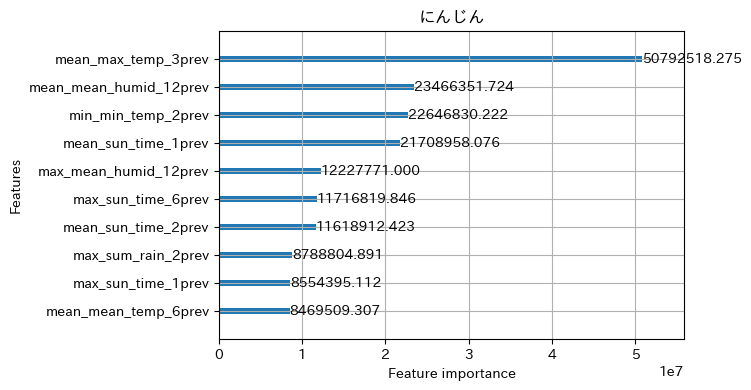

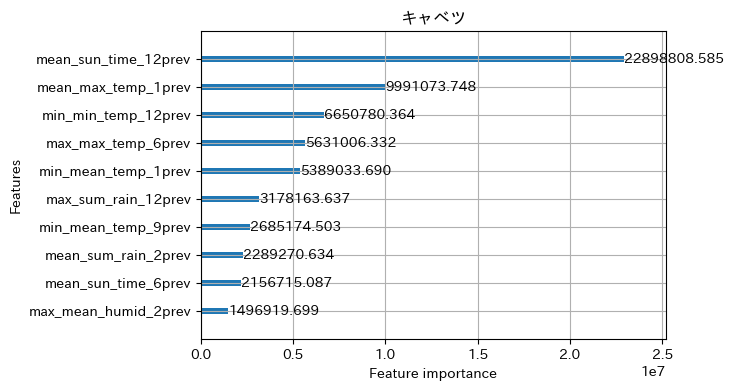

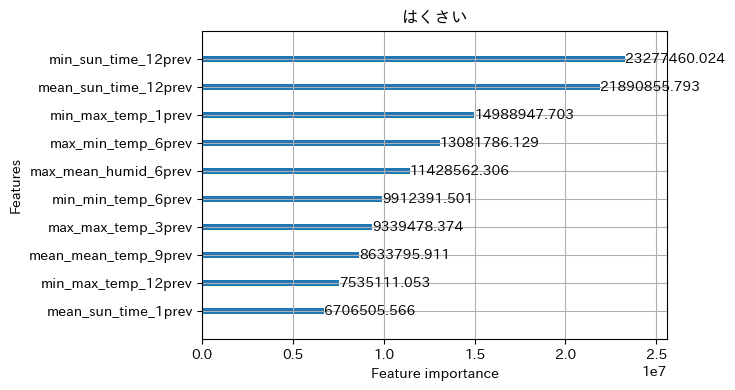

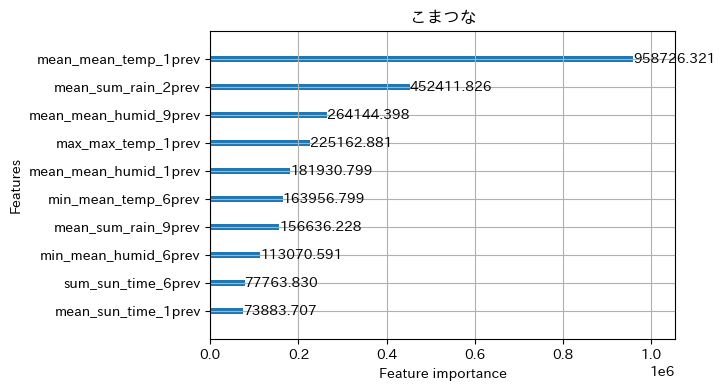

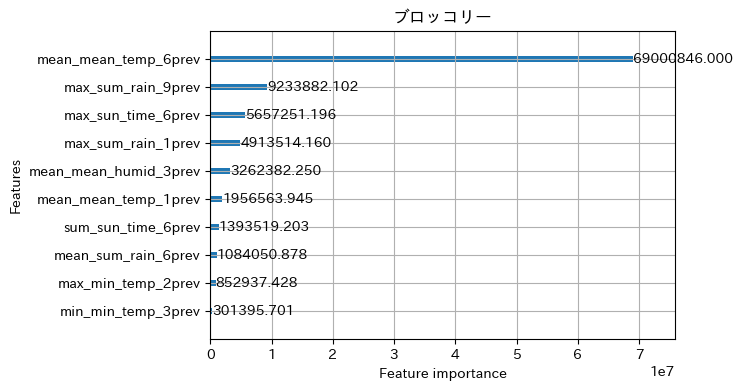

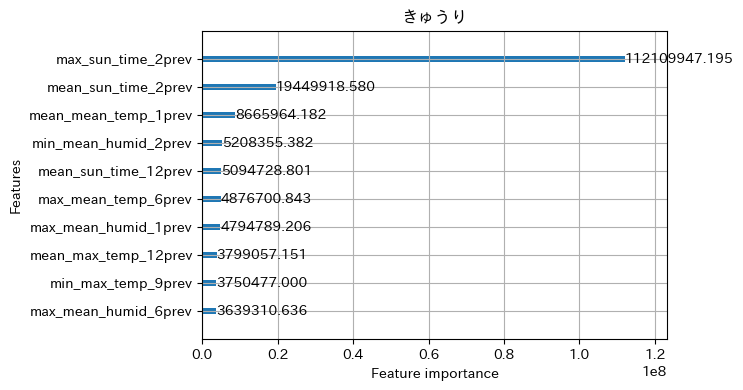

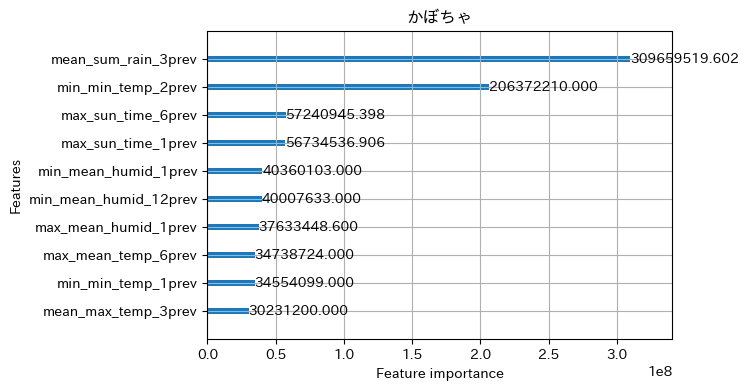

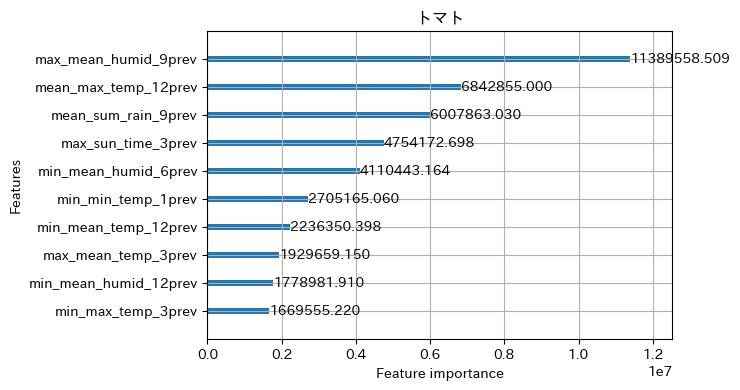

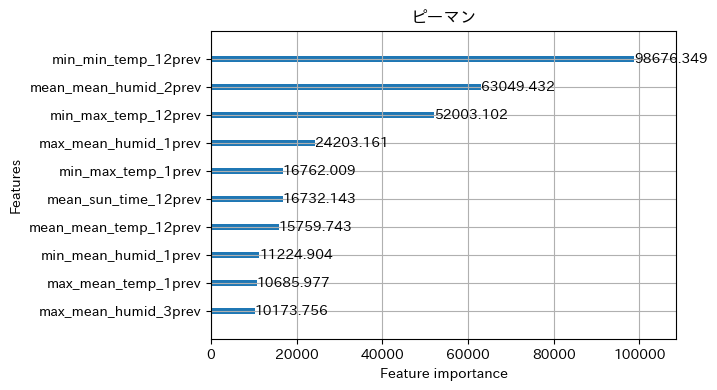

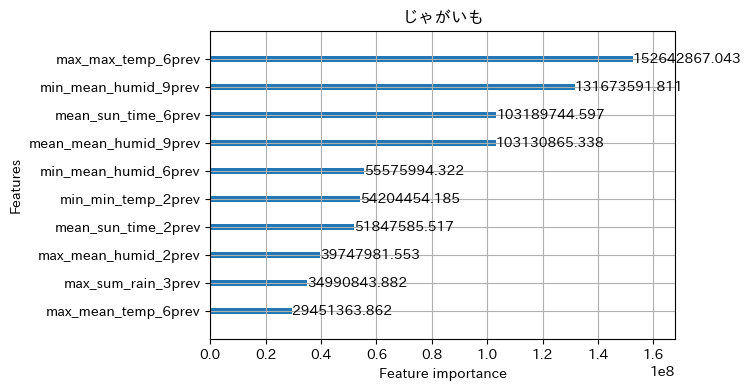

In [28]:
for kind in test_kinds:
    model = model_dict[kind]
    lgb.plot_importance(model, figsize=(6,4), max_num_features=10, importance_type='gain', title=kind)
plt.show()
plt.close()

# 提出ファイル作成

In [29]:
sub[['kind','date','mode_price']].to_csv('submissionv5_外れ値除外.csv', index=False)